In [56]:
# Use SWBD water mask to clip HAND variables
# This acutally had to be done after download of clipped SRTM, but for now it will be too much time to recompute LDD

%matplotlib inline

import logging
import sys

import numpy as np
import pylab
import matplotlib.pyplot as plt
import ogr
import fiona
import shapely.geometry, shapely.wkt
import shapely as sl

import rtree

from utils.shapely_plot import draw

pylab.rcParams['figure.figsize'] = (17.0, 15.0)
logging.basicConfig(stream=sys.stderr, level=logging.INFO)

In [57]:
path = '../shared/SWBD/SWBD.shp'

import fiona

c = fiona.collection(path, "r")
print(c.schema)

type_map = { 'float' : ogr.OFTReal, 'int' : ogr.OFTInteger }

fields = c.schema['properties']
for p in fields:
    print p + ' ' + fields[p]

{'geometry': '3D Polygon', 'properties': OrderedDict([(u'facc_code', 'str:80')])}
facc_code str:80


Total: 608311
Bad geometries: 1


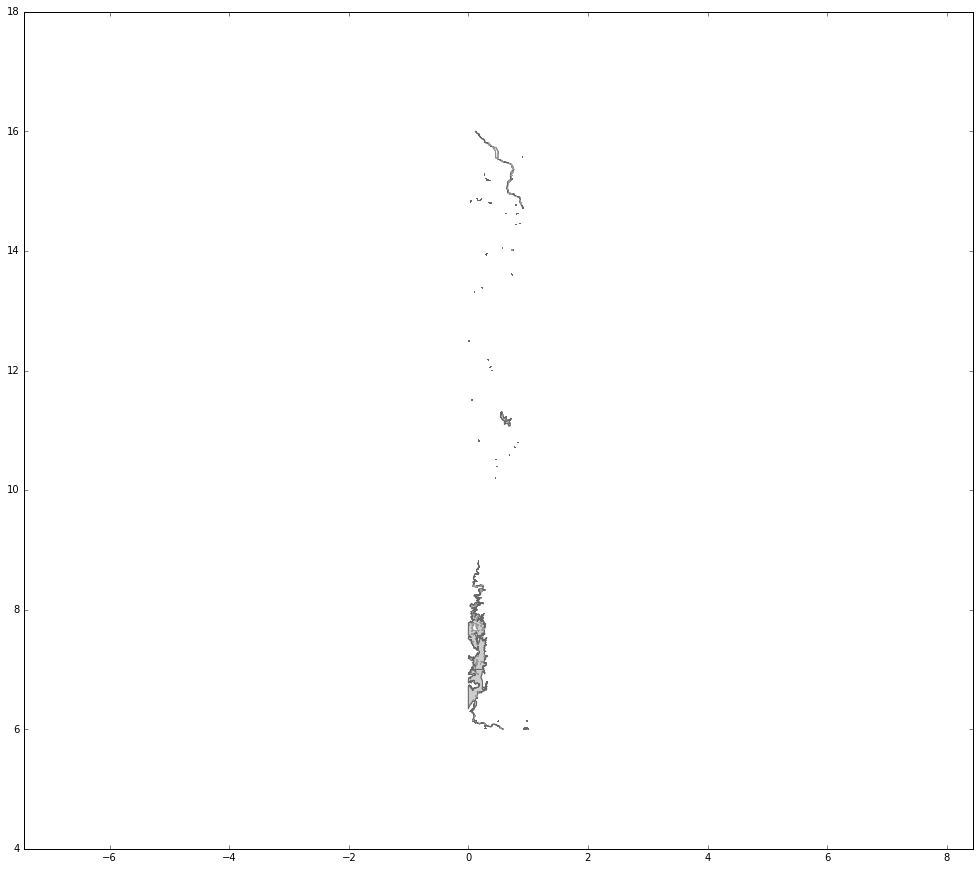

In [85]:
fig = plt.figure()
axes = plt.axes()
axes.set_aspect('equal', 'datalim')

print('Total: {0}'.format(len(c)))

i = 0
bad_count = 0

for f in c:
    geom = sl.geometry.shape(f['geometry'])

    if not geom.is_valid:
        geom = geom.buffer(0.0)
        bad_count = bad_count + 1

    draw(geom)
    
    i = i + 1
    
    if i > 100:
        break
        
print('Bad geometries: {0}'.format(bad_count))

plt.show()

In [83]:
# read index
p = rtree.index.Property()
p.overwrite = False
index_path = path = '../shared/SWBD/SWBD.rtree'
index = rtree.index.Index(index_path, properties = p)

# find features
ids = list(index.intersection((5, 5, 10, 10)))
print(ids)

[8050, 3974, 3975, 3972, 6707, 6688, 6706, 3831, 3884, 3888, 3886, 3885, 3887, 3883, 3882, 3830, 3889, 2727, 5510, 5511, 5515, 5512, 5513, 5514, 5517, 5518, 5516, 5509, 6703, 6705, 6704, 6711, 6699, 6709, 6710, 6700, 6708, 6702, 6701, 8009, 8013, 8012, 8014, 8011, 8010, 9146, 9132, 2823, 2822, 2821, 2820, 2819, 2818, 2817, 2816, 2815, 2814, 2813, 2812, 2811, 2810, 2809, 2807, 2808, 2806, 2805, 2804, 2803, 2802, 2801, 2800, 2034, 2799, 2798, 2797, 2796, 2795, 2794, 2793, 2792, 2791, 2790, 3964, 3965, 3966, 3967, 3968, 3969, 3970, 5541, 5542, 5543, 5544, 5545, 6727, 6728, 6729, 6730, 6731, 6732, 6733, 6734, 6735, 6736, 6737, 6738, 6739, 6740, 6741, 6742, 6743, 6744, 6745, 6746, 6747, 6748, 6749, 6750, 6751, 6752, 6753, 6754, 6755, 6756, 6757, 8045, 8046, 8047, 5528, 5533, 5536, 5538, 5535, 5537, 5529, 5530, 5531, 5539, 5532, 5534, 5540, 6712, 6722, 6721, 6725, 6714, 6726, 6718, 6724, 6713, 6720, 6715, 6719, 6716, 6723, 6717, 8018, 8017, 8015, 8016, 8032, 8034, 8033, 8019, 8024, 8020, 802

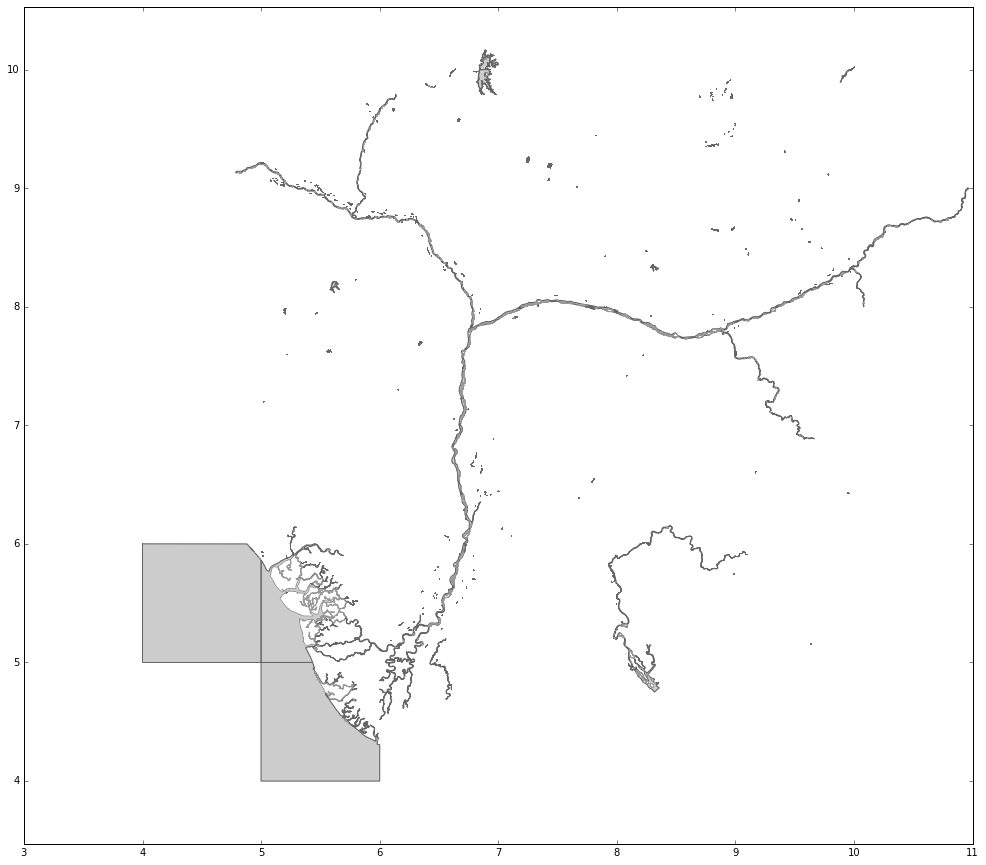

In [84]:
fig = plt.figure()
axes = plt.axes()
axes.set_aspect('equal', 'datalim')

for i in ids:
    geom = sl.geometry.shape(c[i]['geometry'])

    draw(geom)
plt.show()

In [39]:
with fiona.open(path) as source:
    source_driver = source.driver
    source_crs = source.crs
    source_schema = source.schema

    with fiona.open('../shared/SWBD/SWBD_fixed.shp', 'w', driver=source_driver, crs=source_crs, schema=source_schema) as c:
        for f in source:
            c.write(f)